# Hyperthyroid Disorders Prediction

# Introducation:

             Hypothyroidism is a condition where the thyroid gland doesn't produce enough hormones, leading to symptoms like fatigue, weight gain, and depression.To improve diagnosis, this project develops a  machine learning model using patient data such as age, sex, medical history, and specific thyroid-related measurements like TSH and T3 levels. 
               By training and evaluating various models, we aim to predict hypothyroidism more accurately and efficiently, helping doctors provide better patient care.


# Description

                     In this notebook, we are going to predict diagnose thyroid disorders using patient data such as medical history, lab test results, and demographic information etc
                     The dataset we are going to use is the Thyroid disorder predication dataset from Kaggle which contains about 3772 rows × 30 columns features.
                     The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Motivation

                  Hypothyroidism can be hard to diagnose early because its symptoms are common in many other conditions. Traditional diagnosis methods are often slow and expensive. By using machine learning, we can quickly analyze patient data to predict hypothyroidism more accurately. 
                        This project aims to improve early detection and treatment, ultimately enhancing patient outcomes and making healthcare more efficient.


# Column Description

# Import Libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df =pd.read_csv("hypothyroid.csv")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# Replace '?' with NaN

In [4]:

df['TSH'].replace('?', np.nan, inplace=True)
df['TT4'].replace('?', np.nan, inplace=True)
df['T3'].replace('?', np.nan, inplace=True)
df['T4U'].replace('?', np.nan, inplace=True)
df['FTI'].replace('?', np.nan, inplace=True)
df['sex'].replace('?', np.nan, inplace=True)
df['age'].replace('?', np.nan, inplace=True)
df['FTI'].replace('?', np.nan, inplace=True)

# Change Datatype

In [5]:
 
df['age']=df['age'].astype(float)
df['TSH']=df['TSH'].astype(float)
df['T3']=df['T3'].astype(float)
df['TT4']=df['TT4'].astype(float)
df['T4U']=df['T4U'].astype(float)
df['FTI']=df['FTI'].astype(float)

# Checking null values

In [6]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

# For replacing numerical columns

# Taking mean of the column which has null value and replace with mean

In [7]:
 
df_mean=df['age'].mean()
df['age']=df['age'].fillna(df_mean)

df_mean=df['TSH'].mean()
df['TSH']=df['TSH'].fillna(df_mean)

df_mean=df['T3'].mean()
df['T3']=df['T3'].fillna(df_mean)

df_mean=df['TT4'].mean()
df['TT4']=df['TT4'].fillna(df_mean)

df_mean=df['T4U'].mean()
df['T4U']=df['T4U'].fillna(df_mean)

df_mean=df['FTI'].mean()
df['FTI']=df['FTI'].fillna(df_mean)

# For replacing object columns

In [8]:
df.isnull().sum()

age                            0
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                            0
T3 measured                    0
T3                             0
TT4 measured                   0
TT4                            0
T4U measured                   0
T4U                            0
FTI measured                   0
FTI                            0
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

# Taking mode of the column which has null value and replace with mode

In [9]:
mode_value= df["sex"].mode()[0]
df["sex"].fillna(mode_value,inplace= True)

In [10]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

# Drop unnecessary columns

In [11]:
df.drop(columns=["TSH measured","TT4 measured","T4U measured",
                 "FTI measured","TBG measured", "TBG","referral source"], inplace=True)

In [12]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3 measured,T3,TT4,T4U,FTI,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.300000,t,2.5000,125.000000,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.100000,t,2.0000,102.000000,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.980000,f,2.0135,109.000000,0.910,120.000000,P
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.160000,t,1.9000,175.000000,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.720000,t,1.2000,61.000000,0.870,70.000000,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,t,f,f,5.086766,f,2.0135,108.319345,0.995,110.469649,P
3768,68.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.000000,t,2.1000,124.000000,1.080,114.000000,P
3769,74.0,F,f,f,f,f,f,f,f,f,...,f,f,f,5.100000,t,1.8000,112.000000,1.070,105.000000,P
3770,72.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.700000,t,2.0000,82.000000,0.940,87.000000,P


# Checking size (columns,rows) of Dataset

In [13]:

print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 3772
Number of Columns: 23


# Visualization

### Age Distrubution

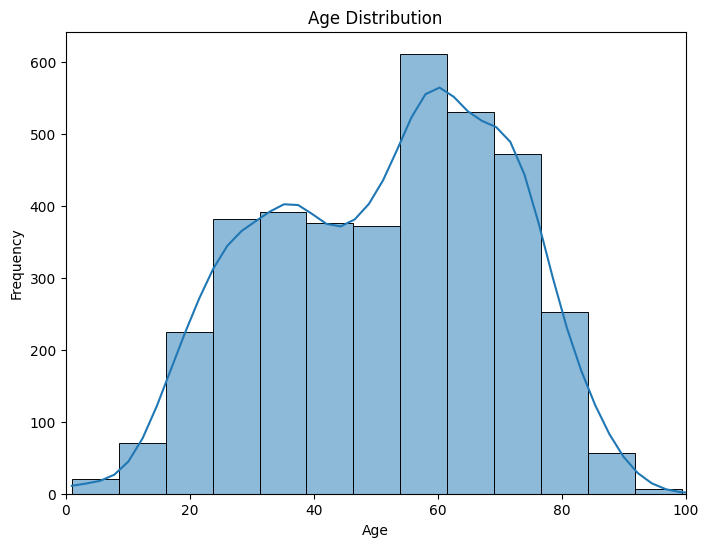

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=60, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Set the x-axis limits
plt.show()


### Distribution of Hypothyroidism Cases by Gender

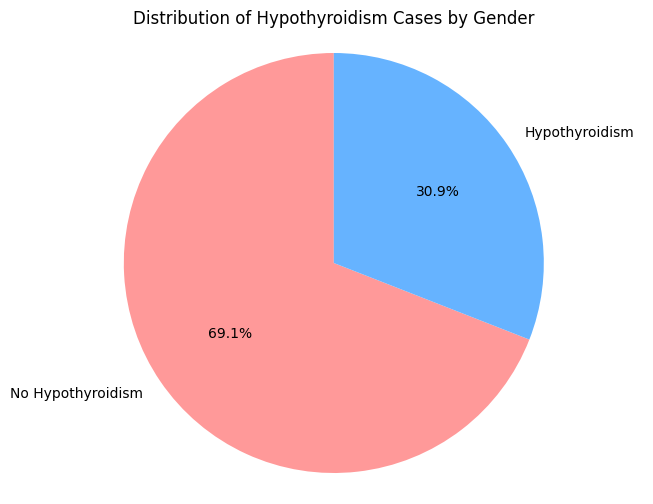

In [15]:
# Group the data by gender and hypothyroidism status
gender_hypothyroidism = df.groupby(['sex', 'binaryClass']).size().unstack()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']  # Color for 'no' and 'yes' hypothyroidism cases
labels = ['No Hypothyroidism', 'Hypothyroidism']
plt.pie(gender_hypothyroidism['P'], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Hypothyroidism Cases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


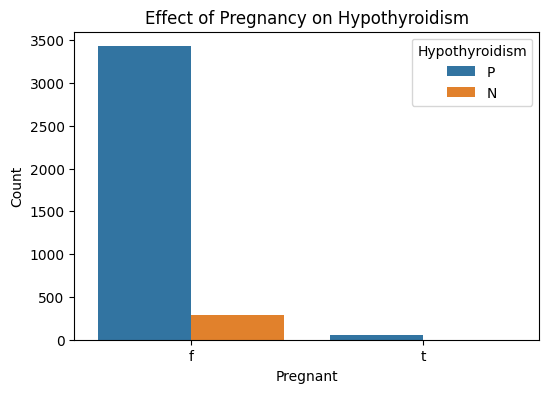

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='pregnant', hue='binaryClass', data=df)
plt.title('Effect of Pregnancy on Hypothyroidism')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.legend(title='Hypothyroidism')
plt.show()



### Effect of Pregnancy on Hypothyroidism

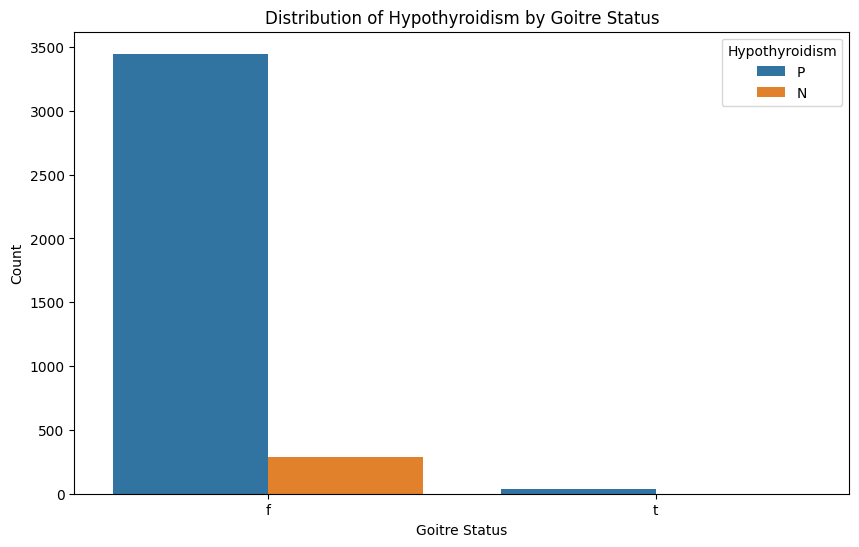

In [17]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='goitre', hue='binaryClass')
plt.title('Distribution of Hypothyroidism by Goitre Status')
plt.xlabel('Goitre Status')
plt.ylabel('Count')
plt.legend(title='Hypothyroidism')
plt.show()


### Relationship Between Age and TSH

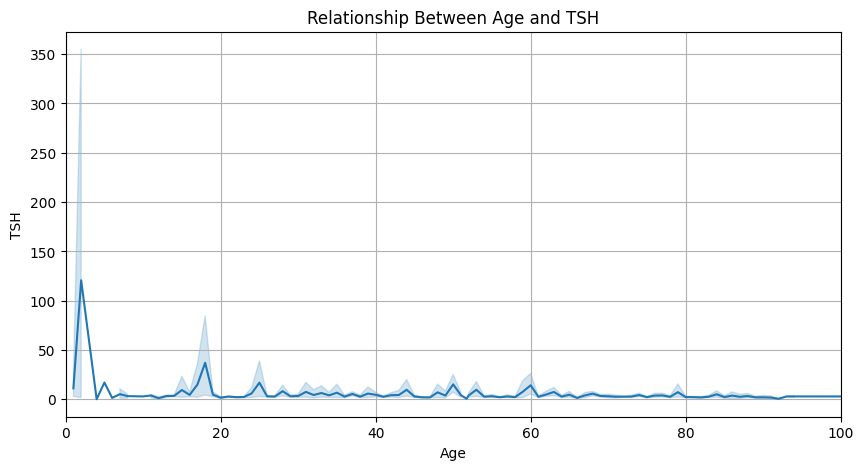

In [18]:
# Choose a hormone variable to analyze (e.g., TSH, T3, TT4)
hormone_variable = 'TSH'  # Replace 'TSH' with the hormone variable you want to analyze

# Plot a line plot showing the relationship between age and the chosen hormone level
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='age', y=hormone_variable)
plt.title('Relationship Between Age and {}'.format(hormone_variable))
plt.xlabel('Age')
plt.ylabel(hormone_variable)
plt.xlim(0, 100)  # Set the x-axis limits
plt.grid(True)  # Add gridlines for better readability
plt.show()

# Separting Numeric and category Data

# Numerical Data 

In [19]:
df_num=df.select_dtypes(['int','float'])
df_num

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.300000,2.5000,125.000000,1.140,109.000000
1,23.0,4.100000,2.0000,102.000000,0.995,110.469649
2,46.0,0.980000,2.0135,109.000000,0.910,120.000000
3,70.0,0.160000,1.9000,175.000000,0.995,110.469649
4,70.0,0.720000,1.2000,61.000000,0.870,70.000000
...,...,...,...,...,...,...
3767,30.0,5.086766,2.0135,108.319345,0.995,110.469649
3768,68.0,1.000000,2.1000,124.000000,1.080,114.000000
3769,74.0,5.100000,1.8000,112.000000,1.070,105.000000
3770,72.0,0.700000,2.0000,82.000000,0.940,87.000000


# Object Data

In [20]:
df_object=df.select_dtypes(['object'])
df_object

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,P
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,P
3768,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P
3769,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,P
3770,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,P


# Label Encoding 

# Using Label Encoder for converting category data into numeric

In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i]) 
#convert the cat to label encoder
df_object

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3769,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3770,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# Feacture scalling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-5.34665107e-01, -1.62607532e-01,  6.59067701e-01,
         4.83610257e-01,  7.83227111e-01, -4.68773538e-02],
       [-1.43109584e+00, -4.23727250e-02, -1.82883889e-02,
        -1.83212226e-01, -5.99693104e-16,  0.00000000e+00],
       [-2.85656570e-01, -1.76348653e-01,  6.01613061e-16,
         1.97337469e-02, -4.59130603e-01,  3.03989426e-01],
       ...,
       [ 1.10879123e+00,  5.68277416e-04, -2.89230825e-01,
         1.06710593e-01,  4.05118242e-01, -1.74465274e-01],
       [ 1.00918782e+00, -1.88372133e-01, -1.82883889e-02,
        -7.63057864e-01, -2.97083945e-01, -7.48610914e-01],
       [ 6.10774159e-01, -1.75489833e-01,  2.52654047e-01,
        -2.70189072e-01,  4.05118242e-01, -5.89126014e-01]])

In [25]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

           age           TSH            T3           TT4           T4U  \
0    -0.534665 -1.626075e-01  6.590677e-01  4.836103e-01  7.832271e-01   
1    -1.431096 -4.237273e-02 -1.828839e-02 -1.832122e-01 -5.996931e-16   
2    -0.285657 -1.763487e-01  6.016131e-16  1.973375e-02 -4.591306e-01   
3     0.909584 -2.115603e-01 -1.537596e-01  1.933224e+00 -5.996931e-16   
4     0.909584 -1.875133e-01 -1.102058e+00 -1.371896e+00 -6.751928e-01   
...        ...           ...           ...           ...           ...   
3767 -1.082484 -3.813927e-17  6.016131e-16  4.120051e-16 -5.996931e-16   
3768  0.809981 -1.754898e-01  1.171828e-01  4.546180e-01  4.591338e-01   
3769  1.108791  5.682774e-04 -2.892308e-01  1.067106e-01  4.051182e-01   
3770  1.009188 -1.883721e-01 -1.828839e-02 -7.630579e-01 -2.970839e-01   
3771  0.610774 -1.754898e-01  2.526540e-01 -2.701891e-01  4.051182e-01   

           FTI  
0    -0.046877  
1     0.000000  
2     0.303989  
3     0.000000  
4    -1.290860  
...      

# Concatenate Numerical and Categorical Columns

In [26]:
df_new=pd.concat([df_scaled,df_object],axis=1)
df_new

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured,binaryClass
0,-0.534665,-1.626075e-01,6.590677e-01,4.836103e-01,7.832271e-01,-0.046877,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-1.431096,-4.237273e-02,-1.828839e-02,-1.832122e-01,-5.996931e-16,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.285657,-1.763487e-01,6.016131e-16,1.973375e-02,-4.591306e-01,0.303989,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.909584,-2.115603e-01,-1.537596e-01,1.933224e+00,-5.996931e-16,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.909584,-1.875133e-01,-1.102058e+00,-1.371896e+00,-6.751928e-01,-1.290860,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-1.082484,-3.813927e-17,6.016131e-16,4.120051e-16,-5.996931e-16,0.000000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3768,0.809981,-1.754898e-01,1.171828e-01,4.546180e-01,4.591338e-01,0.112608,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3769,1.108791,5.682774e-04,-2.892308e-01,1.067106e-01,4.051182e-01,-0.174465,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3770,1.009188,-1.883721e-01,-1.828839e-02,-7.630579e-01,-2.970839e-01,-0.748611,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# split the data

In [27]:
y=df_new.iloc[:,-1:]
y

,binaryClass
0,1
1,1
2,1
3,1
4,1
...,...
3767,1
3768,1
3769,1
3770,1


In [28]:
x=df_new.drop('binaryClass',axis=1)
x

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3 measured
0,-0.534665,-1.626075e-01,6.590677e-01,4.836103e-01,7.832271e-01,-0.046877,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.431096,-4.237273e-02,-1.828839e-02,-1.832122e-01,-5.996931e-16,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.285657,-1.763487e-01,6.016131e-16,1.973375e-02,-4.591306e-01,0.303989,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.909584,-2.115603e-01,-1.537596e-01,1.933224e+00,-5.996931e-16,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.909584,-1.875133e-01,-1.102058e+00,-1.371896e+00,-6.751928e-01,-1.290860,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-1.082484,-3.813927e-17,6.016131e-16,4.120051e-16,-5.996931e-16,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3768,0.809981,-1.754898e-01,1.171828e-01,4.546180e-01,4.591338e-01,0.112608,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3769,1.108791,5.682774e-04,-2.892308e-01,1.067106e-01,4.051182e-01,-0.174465,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3770,1.009188,-1.883721e-01,-1.828839e-02,-7.630579e-01,-2.970839e-01,-0.748611,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Distrubution of Target Column Values

In [29]:
y.value_counts()

binaryClass
1              3481
0               291
Name: count, dtype: int64

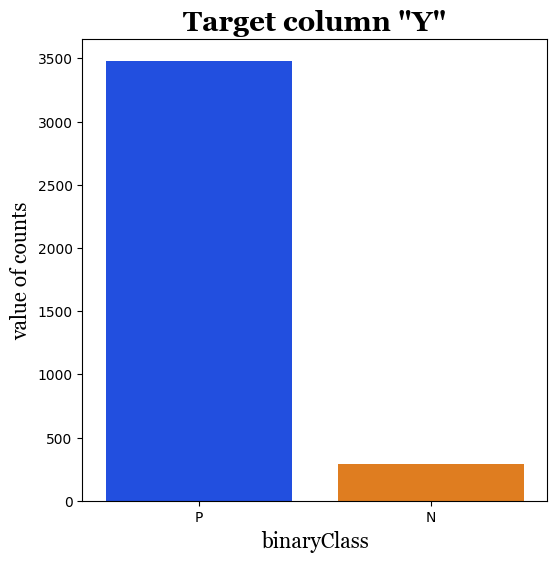

In [31]:
binaryClass = df['binaryClass'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=binaryClass.index, y=binaryClass.values, palette='bright')
plt.title('Target column "Y"', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('binaryClass', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('value of counts', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [32]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [33]:
x=x_ros
y=y_ros

In [34]:
y.value_counts()     

binaryClass
0              3481
1              3481
Name: count, dtype: int64

# Importing the models and Train them

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Spliting training and testing Data

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()

In [38]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [39]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1032
           1       0.96      0.97      0.97      1057

    accuracy                           0.97      2089
   macro avg       0.97      0.97      0.97      2089
weighted avg       0.97      0.97      0.97      2089



LogisticRegression()

### Accuracy score on the train data

In [40]:
y_pred = logreg.predict(x_train)
Train_Accuracy_lr = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_lr*100,2),"%")

Accuracy score of the training data :  97.17 %


### Accuracy score on the test data

In [41]:
y_pred_on_test_data = logreg.predict(x_test)
Test_Accuracy_lr = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_lr*100,2),"%")

Accuracy score of the test data :  96.65 %


# KNN

In [42]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1032
           1       1.00      0.91      0.95      1057

    accuracy                           0.95      2089
   macro avg       0.96      0.95      0.95      2089
weighted avg       0.96      0.95      0.95      2089



KNeighborsClassifier()

### Accuracy score on the train data

In [43]:
y_pred = knn.predict(x_train)
Train_Accuracy_kn = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_kn*100,2),"%")

Accuracy score of the training data :  96.47 %


### Accuracy score on the test data

In [44]:
y_pred_on_test_data = knn.predict(x_test)
Test_Accuracy_kn = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_kn*100,2),"%")

Accuracy score of the test data :  95.36 %


# Decision Tree

In [45]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1032
           1       1.00      1.00      1.00      1057

    accuracy                           1.00      2089
   macro avg       1.00      1.00      1.00      2089
weighted avg       1.00      1.00      1.00      2089



DecisionTreeClassifier()

### Accuracy score on the train data

In [46]:
y_pred = dt.predict(x_train)
Train_Accuracy_dt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt*100,2),"%")

Accuracy score of the training data :  100.0 %


### Accuracy score on the test data

In [47]:
y_pred_on_test_data = dt.predict(x_test)
Test_Accuracy_dt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt*100,2),"%")

Accuracy score of the test data :  99.95 %


# Pruning techniques --> to solve the overfitting (hyper tunning)

## Max-Depth

In [48]:
for i in range(1, 30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train, y_train)
    ypred=dt1.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

1 - 0.9837242699856391
2 - 0.9842029679272379
3 - 0.9961704164672092
4 - 0.9971278123504069
5 - 0.9971278123504069
6 - 0.9990426041168023
7 - 0.9985639061752034
8 - 0.9995213020584012
9 - 0.9995213020584012
10 - 0.9995213020584012
11 - 0.9995213020584012
12 - 0.9995213020584012
13 - 0.9995213020584012
14 - 0.9995213020584012
15 - 0.9990426041168023
16 - 0.9995213020584012
17 - 0.9995213020584012
18 - 0.9990426041168023
19 - 0.9995213020584012
20 - 0.9995213020584012
21 - 0.9990426041168023
22 - 0.9995213020584012
23 - 0.9990426041168023
24 - 0.9995213020584012
25 - 0.9995213020584012
26 - 0.9995213020584012
27 - 0.9990426041168023
28 - 0.9995213020584012
29 - 0.9995213020584012


In [49]:
dt2=DecisionTreeClassifier(max_depth=2)
dt2.fit(x_train, y_train)
ypred=dt2.predict(x_test)

In [50]:
dt2.score(x_train, y_train)

0.9864559819413092

In [51]:
dt2.score(x_test, y_test)

0.9842029679272379

### Min_sample_split()

In [52]:
for i in range(31,50):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train, y_train)
    ypred=dt3.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')
    

31 - 0.9961704164672092
32 - 0.9956917185256103
33 - 0.9961704164672092
34 - 0.9956917185256103
35 - 0.9956917185256103
36 - 0.9956917185256103
37 - 0.9961704164672092
38 - 0.9961704164672092
39 - 0.9956917185256103
40 - 0.9956917185256103
41 - 0.9952130205840115
42 - 0.9952130205840115
43 - 0.9952130205840115
44 - 0.9952130205840115
45 - 0.9952130205840115
46 - 0.9952130205840115
47 - 0.9952130205840115
48 - 0.9952130205840115
49 - 0.9952130205840115


In [53]:
dt4=DecisionTreeClassifier(min_samples_split=154)
dt4.fit(x_train, y_train)
ypred=dt4.predict(x_test)

dt4.score(x_train, y_train)


0.9874820439154525

In [54]:
dt4.score(x_test, y_test)

0.9865964576352322

### Min_sample_leaf

In [55]:
for i in range(31,60):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(x_train, y_train)
    ypred=dt5.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

31 - 0.9928195308760173
32 - 0.9928195308760173
33 - 0.9928195308760173
34 - 0.9928195308760173
35 - 0.9928195308760173
36 - 0.9928195308760173
37 - 0.9899473432264241
38 - 0.9899473432264241
39 - 0.9899473432264241
40 - 0.9899473432264241
41 - 0.9899473432264241
42 - 0.9899473432264241
43 - 0.9899473432264241
44 - 0.9894686452848253
45 - 0.9913834370512207
46 - 0.9913834370512207
47 - 0.9913834370512207
48 - 0.9913834370512207
49 - 0.9894686452848253
50 - 0.9894686452848253
51 - 0.9894686452848253
52 - 0.9894686452848253
53 - 0.9894686452848253
54 - 0.9894686452848253
55 - 0.9894686452848253
56 - 0.9837242699856391
57 - 0.9837242699856391
58 - 0.9837242699856391
59 - 0.9837242699856391


In [56]:
dt6=DecisionTreeClassifier(min_samples_leaf=59)
dt6.fit(x_train, y_train)
ypred=dt6.predict(x_test)



In [57]:
dt6.score(x_train, y_train)


0.9856351323619946

In [58]:
dt6.score(x_test, y_test)


0.9837242699856391

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1032
           1       1.00      0.97      0.98      1057

    accuracy                           0.98      2089
   macro avg       0.98      0.98      0.98      2089
weighted avg       0.98      0.98      0.98      2089



In [60]:
y_pred = dt6.predict(x_train)
Train_Accuracy_dt6 = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt6*100,2),"%")

Accuracy score of the training data :  98.56 %


In [61]:
y_pred_on_test_data = dt6.predict(x_test)
Test_Accuracy_dt6 = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt6*100,2),"%")

Accuracy score of the test data :  98.37 %


# Random forest

In [62]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1032
           1       1.00      0.99      1.00      1057

    accuracy                           1.00      2089
   macro avg       1.00      1.00      1.00      2089
weighted avg       1.00      1.00      1.00      2089



RandomForestClassifier()

### Accuracy score on the train data

In [63]:
y_pred = rf.predict(x_train)
Train_Accuracy_rf = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_rf*100,2),"%")

Accuracy score of the training data :  100.0 %


### Accuracy score on the test data

In [64]:
y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_rf = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_rf*100,2),"%")

Accuracy score of the test data :  99.66 %


# SVM

In [65]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1032
           1       0.98      0.97      0.98      1057

    accuracy                           0.98      2089
   macro avg       0.98      0.98      0.98      2089
weighted avg       0.98      0.98      0.98      2089



SVC()

### Accuracy score on the train data

In [66]:

y_pred = svm.predict(x_train)
Train_Accuracy_svm = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_svm*100,2),"%")

Accuracy score of the training data :  97.6 %


### Accuracy score on the test data

In [67]:

y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_svm = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_svm*100,2),"%")

Accuracy score of the test data :  99.66 %


In [68]:
ML_Model=['Logistic Regression','k-Nearest Neighbors Regression','Decision Tree','Random Forest',' SVM']

Train_Accuracy=[Train_Accuracy_lr,Train_Accuracy_kn,Train_Accuracy_dt6,Train_Accuracy_rf,Train_Accuracy_svm]
Train_ACC = [round(i,3) for i in Train_Accuracy]

Test_Accuracy=[Test_Accuracy_lr,Test_Accuracy_kn,Test_Accuracy_dt6,Test_Accuracy_rf,Test_Accuracy_svm]
Test_ACC = [round(i,3) for i in Test_Accuracy]



In [69]:
#creating dataframe
results = pd.DataFrame({'ML Model': ML_Model,
                        'Train Accuracy':Train_Accuracy, 
                        'Test Accuracy': Test_Accuracy}, index=[1,2,3,4,5])

In [70]:
results

,ML Model,Train Accuracy,Test Accuracy
1,Logistic Regression,0.971681,0.966491
2,k-Nearest Neighbors Regression,0.964703,0.953566
3,Decision Tree,0.985635,0.983724
4,Random Forest,1.000000,0.996649
5,SVM,0.975990,0.996649


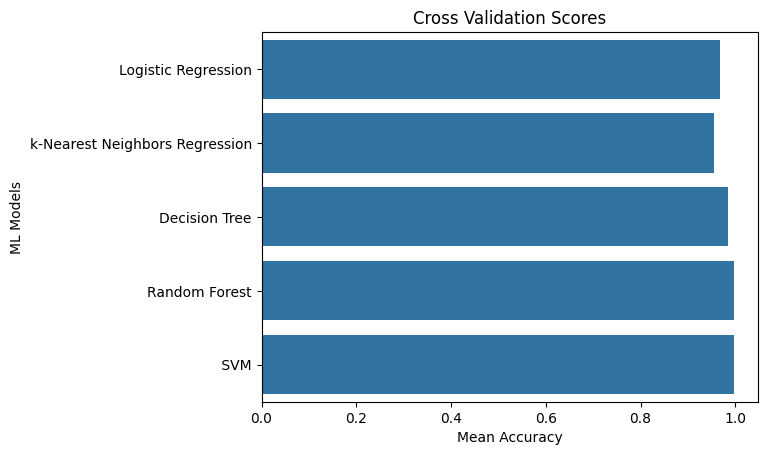

In [71]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.968,0.954,0.984,0.997,0.997],
    "ML Models": ['Logistic Regression','k-Nearest Neighbors Regression','Decision Tree','Random Forest',' SVM']})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# Conclusion